Importing the libararies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 

Data collection and pre-processing

In [ ]:
#loading the data to oandas data frame
gold_data=pd.read_csv('/content/gld_price_data.csv')
gold_data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
#gerring some basic information from the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
Positive
Negative

In [ ]:
correlation = gold_data.corr()

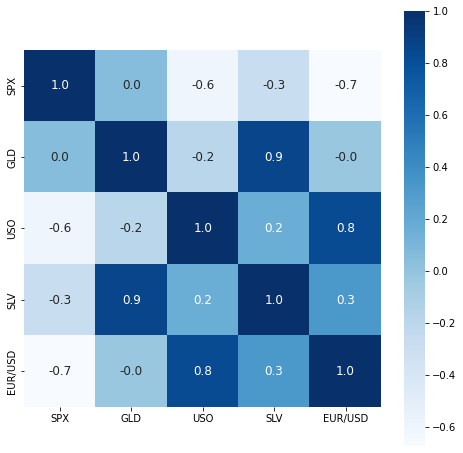

In [ ]:
#constructting a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws= {'size':12}, cmap='Blues')

In [ ]:
#correlation value of Gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


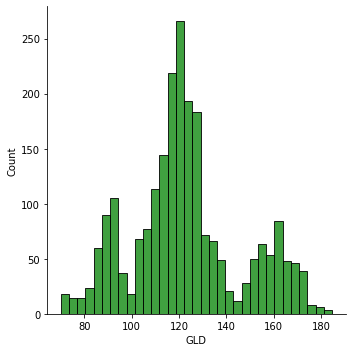

In [ ]:
#CHECKING THE DISTRIBUTION of the GLD price
sns.displot(gold_data['GLD'], color='Green')
#count=number of values oat which gold price lie it depend on x axis          count=density

Spilitting the features and target

In [ ]:
X= gold_data.drop(['Date','GLD'],axis=1)
Y= gold_data['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training data and test data

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


Model Training: Random Forest Regressor

In [ ]:
regressor= RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation on TEST data

In [ ]:
#prediction on the test data
train_data_prediction= regressor.predict(X_train)
print(train_data_prediction)


[109.99229816 114.78330095  90.76410002 ... 130.95449718 159.77359505
 114.60539976]


In [ ]:
print(Y_train)

476     109.879997
1958    115.540001
248      90.930000
2231    125.370003
1325    119.889999
           ...    
1071    169.610001
433     109.800003
674     129.869995
1099    159.429993
1608    115.139999
Name: GLD, Length: 1832, dtype: float64


In [ ]:
#r square error
error_score= metrics.r2_score(Y_train, train_data_prediction)
print('R square error on train data:',error_score)

R square error on train data: 0.9983603690577263


Compare the actual price and predicted price on the train data

[109.879997, 115.540001, 90.93, 125.370003, 119.889999, 95.449997, 152.429993, 117.57, 80.389999, 121.309998, 104.370003, 127.400002, 122.279999, 117.459999, 120.459999, 120.989998, 130.850006, 118.68, 118.470001, 115.110001, 104.860001, 154.570007, 107.849998, 124.529999, 82.800003, 184.589996, 91.5, 167.869995, 104.800003, 172.410004, 154.830002, 132.419998, 122.290001, 122.669998, 139.919998, 125.959999, 116.059998, 126.809998, 122.949997, 141.110001, 75.480003, 92.290001, 112.309998, 120.830002, 129.130005, 123.449997, 125.980003, 123.239998, 117.650002, 104.309998, 117.599998, 83.870003, 93.129997, 122.019997, 116.849998, 92.110001, 126.959999, 97.720001, 104.080002, 90.080002, 137.220001, 109.43, 120.730003, 91.199997, 117.110001, 128.889999, 112.730003, 155.360001, 149.460007, 110.290001, 96.5, 115.389999, 124.769997, 80.650002, 116.980003, 92.290001, 142.149994, 108.419998, 109.599998, 88.800003, 117.029999, 109.790001, 116.739998, 136.029999, 116.150002, 117.980003, 157.929993

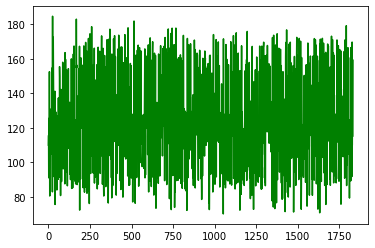

In [ ]:
Y_train= list(Y_train)
plt.plot(Y_train, Color='Green', label='Actual train value')
print(Y_train)

In [ ]:
len(Y_train)

1832

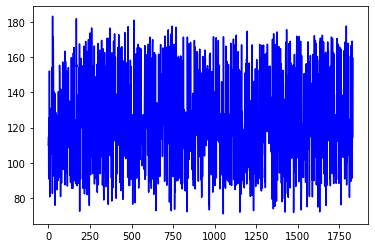

In [ ]:
plt.plot(train_data_prediction, Color='Blue', label='Predicted Train value')

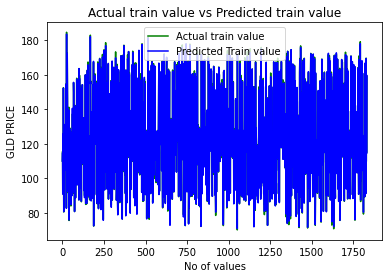

In [ ]:
plt.plot(Y_train, Color='Green', label='Actual train value')
plt.plot(train_data_prediction, Color='Blue', label='Predicted Train value')
plt.title('Actual train value vs Predicted train value')
plt.xlabel('No of values')
plt.ylabel('GLD PRICE')
plt.legend()
plt.show()

Model Evaluation on test dta

In [ ]:
#prediction on the test data
test_data_prediction= regressor.predict(X_test)
print(test_data_prediction)


[168.78659971  82.13829985 115.9521002  127.6397005  120.88130144
 154.78649762 150.44119909 126.21750047 117.61999861 126.05340101
 116.51220093 171.83130063 141.89759799 167.65729813 115.27080028
 117.54100019 139.30350313 170.1442008  159.89370307 159.35319952
 155.18079995 124.73700003 176.07479848 156.9682033  125.27720046
  93.72229981  77.64930038 121.20259993 119.05649887 167.55979991
  88.19550094 125.25609996  91.21460067 117.87390001 121.19639894
 136.5751009  115.46270088 114.99920042 147.966799   107.34220126
 104.39590254  87.06559762 126.51700044 117.97470006 154.73049873
 119.6101999  108.35270011 108.00609842  93.2082003  127.31029702
  74.68500035 113.63359914 121.24970009 111.35369899 118.84229887
 120.82399938 158.88639987 167.42100142 146.92159695  85.52489835
  94.40950045  86.93599882  90.45800011 119.07910061 126.41090087
 127.66000019 169.20400031 122.31089961 117.38109892  98.51740063
 167.77330101 142.9294988  131.75460229 121.2568022  121.07409912
 119.71870

In [ ]:
print(Y_test)

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
923     166.380005
1693    106.379997
2054    122.239998
658     133.830002
376     102.360001
Name: GLD, Length: 458, dtype: float64


In [ ]:
#r square error
error_score_test= metrics.r2_score(Y_test, test_data_prediction)
print('R square error on test data:',error_score_test)

R square error on test data: 0.9896405682006028


Compare the actual price and predicted price on the train data

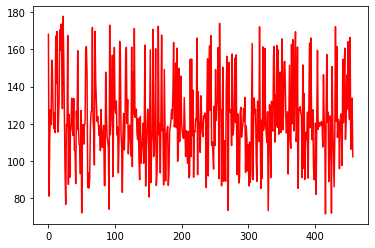

In [ ]:
Y_test = list(Y_test)
plt.plot(Y_test, Color='Red', label='Actual train value')

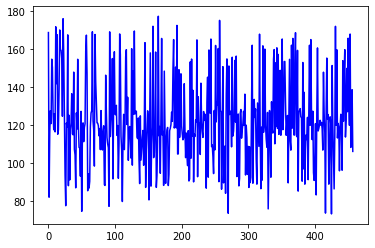

In [ ]:
plt.plot(test_data_prediction, Color='Blue', label='Predicted Test value')

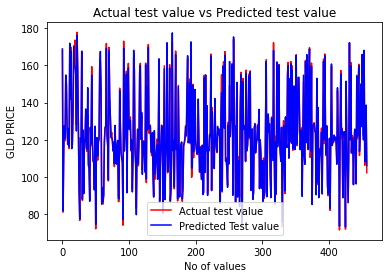

In [ ]:
plt.plot(Y_test, Color='Red', label='Actual test value')
plt.plot(test_data_prediction, Color='Blue', label='Predicted Test value')
plt.title('Actual test value vs Predicted test value')
plt.xlabel('No of values')
plt.ylabel('GLD PRICE')
plt.legend()
plt.show()